In [2]:
import numpy as np 
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


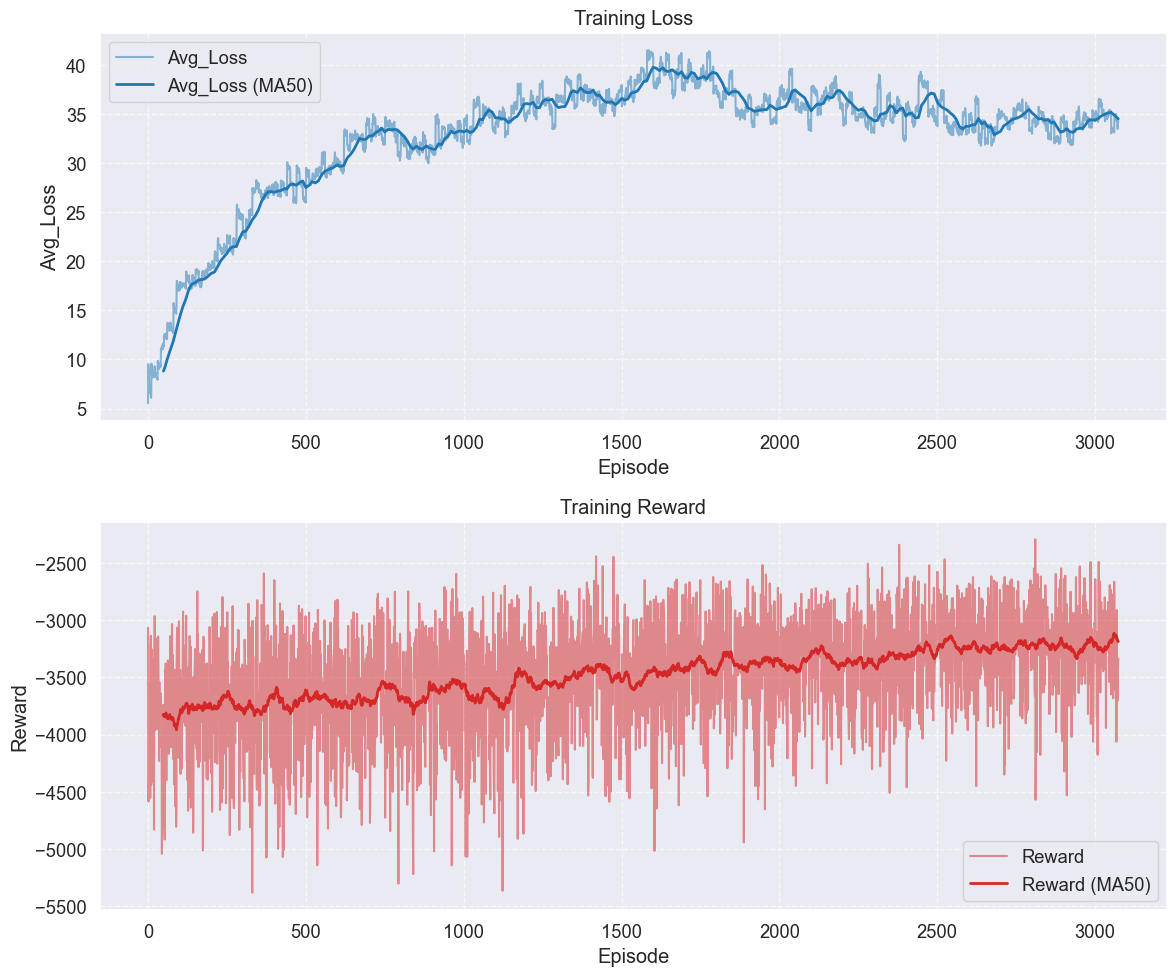

<Figure size 640x480 with 0 Axes>

In [5]:
# DQN
# 设置绘图风格
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# 读取CSV文件
df = pd.read_csv('./logs/loss_log.csv')

# 创建平滑曲线
window_size = 50  # 平滑窗口大小
df_smooth = df.copy()
df_smooth['Avg_Loss'] = df['Avg_Loss'].rolling(window=window_size).mean()
df_smooth['Reward'] = df['Reward'].rolling(window=window_size).mean()

# 创建两个子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# 第一个子图：Avg_Loss
ax1.plot(df['Episode'], df['Avg_Loss'], color='tab:blue', alpha=0.5, label='Avg_Loss')
ax1.plot(df_smooth['Episode'], df_smooth['Avg_Loss'], color='tab:blue', linewidth=2, label=f'Avg_Loss (MA{window_size})')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Avg_Loss')
ax1.set_title('Training Loss')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# 第二个子图：Reward
ax2.plot(df['Episode'], df['Reward'], color='tab:red', alpha=0.5, label='Reward')
ax2.plot(df_smooth['Episode'], df_smooth['Reward'], color='tab:red', linewidth=2, label=f'Reward (MA{window_size})')
ax2.set_xlabel('Episode')
ax2.set_ylabel('Reward')
ax2.set_title('Training Reward')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

# 保存图形
plt.savefig('./figures/DQN_loss_reward_plots.png', dpi=300, bbox_inches='tight')

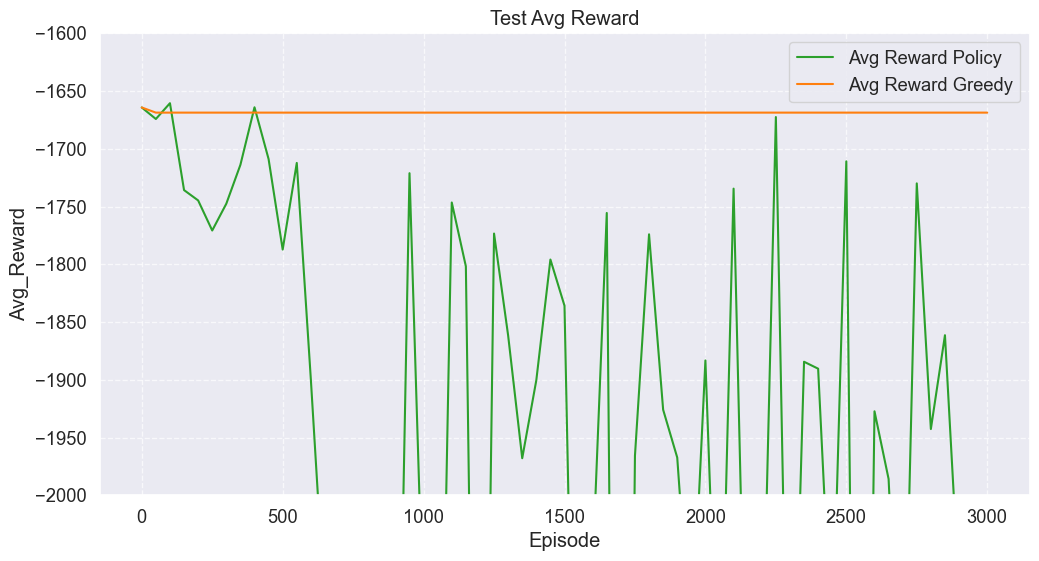

In [ ]:
# analyze the test_log.csv
df_test = pd.read_csv('./logs/test_log.csv')

# plot the test log
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_test['Epoch'], df_test['Avg_Reward_Policy'], color='tab:green', label='Avg Reward Policy')  # first line
# second line
ax.plot(df_test['Epoch'], df_test['Avg_Reward_Greedy'], color='tab:orange', label='Avg Reward Greedy') # second line
ax.set_xlabel('Episode')
ax.set_ylabel('Avg_Reward')
ax.set_title('Test Avg Reward')
# set range of y-axis
# ax.set_ylim(-2000, -1600)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)



In [8]:
# list epochs which improvements are positive
improvement_epochs = df_test[df_test['Improvement'] > 0]['Epoch'].tolist()
# print epoch and its improvement, from large to small
improvement_epochs.sort(key=lambda x: df_test[df_test['Epoch'] == x]['Improvement'].values[0], reverse=True)
for epoch in improvement_epochs:
    print(f"Epoch: {epoch}, Improvement: {df_test[df_test['Epoch'] == epoch]['Improvement'].values[0]:%}")

import shutil

for epoch in improvement_epochs:
    policy_model_path = f'./saved_models/Circular_DQN_{epoch}_policy'
    target_model_path = f'./saved_models/Circular_DQN_{epoch}_target'
    shutil.copy(policy_model_path, f'./best_models/Circular_DQN_{epoch}_policy')
    shutil.copy(target_model_path, f'./best_models/Circular_DQN_{epoch}_target')

# save the stats of above epochs to txt file
with open('./best_models/best_model_stats.txt', 'w') as f:
    for epoch in improvement_epochs:
        f.write(f"Epoch: {epoch}, Improvement: {df_test[df_test['Epoch'] == epoch]['Improvement'].values[0]:%}\n")



Epoch: 100, Improvement: 0.488998%
Epoch: 400, Improvement: 0.276859%


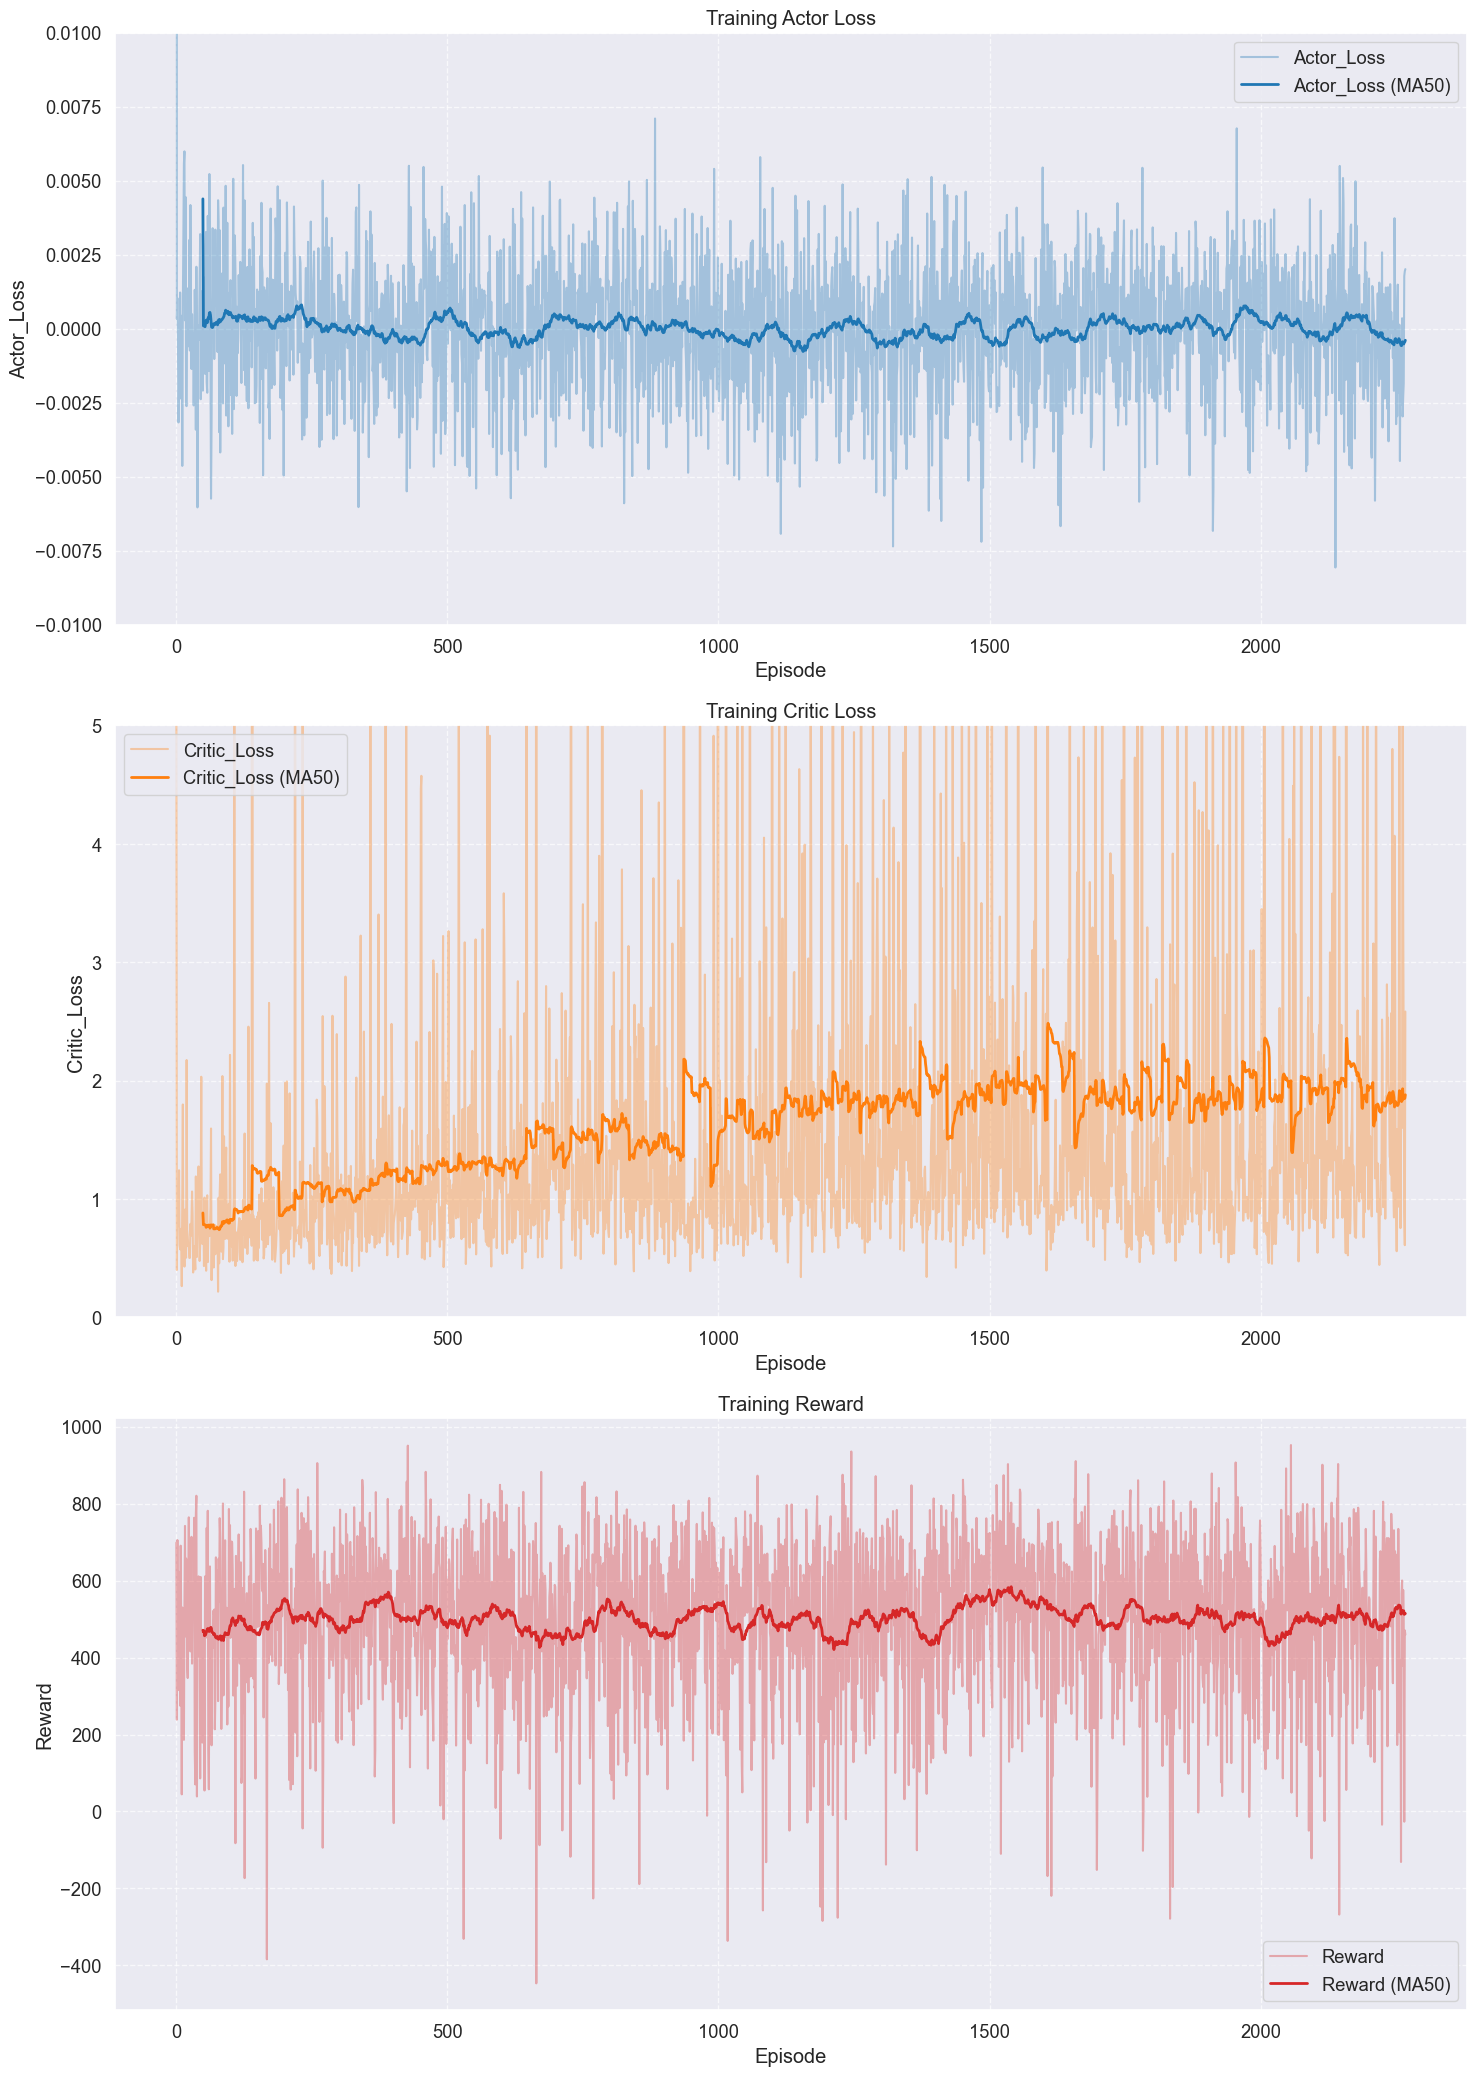

<Figure size 640x480 with 0 Axes>

In [48]:
# PPO
# 设置绘图风格
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# 读取CSV文件
df = pd.read_csv('./logs/ppo_loss_log.csv')

# 只保留前10000个Episode的数据
# df = df[df['Episode'] <= 5000]

# 创建平滑曲线
window_size = 50  # 平滑窗口大小
df_smooth = df.copy()
df_smooth['Avg_Actor_Loss'] = df['Actor_Loss'].rolling(window=window_size).mean()
df_smooth['Avg_Critic_Loss'] = df['Critic_Loss'].rolling(window=window_size).mean()
df_smooth['Avg_Reward'] = df['Reward'].rolling(window=window_size).mean()


# 3 个子图
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 21))

# 第一个子图：Actor Loss
ax1.plot(df['Episode'], df['Actor_Loss'], color='tab:blue', alpha=0.35, label='Actor_Loss')
ax1.plot(df_smooth['Episode'], df_smooth['Avg_Actor_Loss'], color='tab:blue', linewidth=2, label=f'Actor_Loss (MA{window_size})')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Actor_Loss')
ax1.set_title('Training Actor Loss')
ax1.set_ylim(-0.01, 0.01)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# 第二个子图：Critic Loss
ax2.plot(df['Episode'], df['Critic_Loss'], color='tab:orange', alpha=0.35, label='Critic_Loss')
ax2.plot(df_smooth['Episode'], df_smooth['Avg_Critic_Loss'], color='tab:orange', linewidth=2, label=f'Critic_Loss (MA{window_size})')
ax2.set_xlabel('Episode')
ax2.set_ylabel('Critic_Loss')
ax2.set_title('Training Critic Loss')
ax2.set_ylim(0, 5)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# 第三个子图：Reward
ax3.plot(df['Episode'], df['Reward'], color='tab:red', alpha=0.35, label='Reward')
ax3.plot(df_smooth['Episode'], df_smooth['Avg_Reward'], color='tab:red', linewidth=2, label=f'Reward (MA{window_size})')
ax3.set_xlabel('Episode')
ax3.set_ylabel('Reward')
ax3.set_title('Training Reward')
ax3.legend()
ax3.grid(True, linestyle='--', alpha=0.7)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

# 保存图形
plt.savefig('./figures/PPO_loss_reward_plots.png', dpi=300, bbox_inches='tight')